# Image Compression using DFT

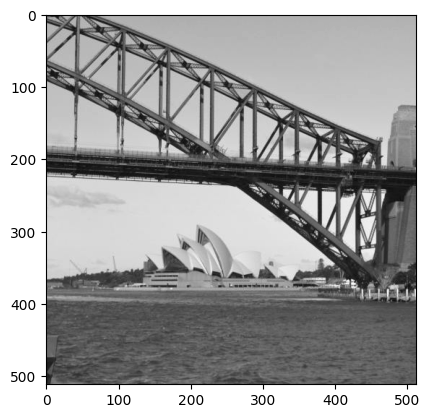

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2 

f = np.array(plt.imread('operahall.png'), dtype=float)
plt.imshow(f,cmap='gray');

## Visualizing a 2D DFT

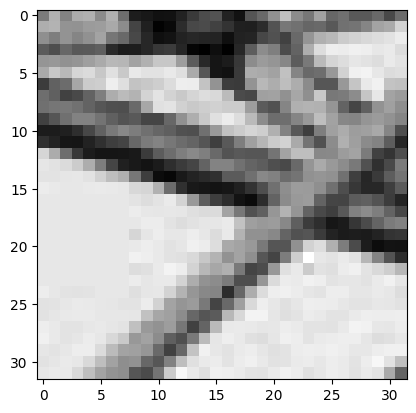

In [2]:
box1 = f[0:32, 0:32]
plt.imshow(box1,cmap='gray'); 

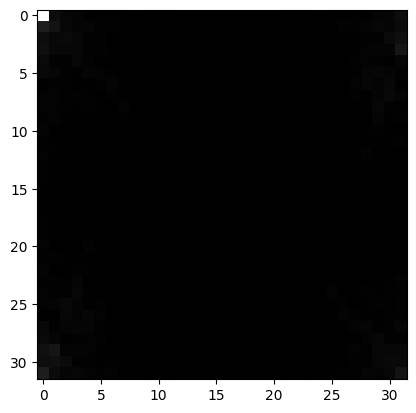

In [3]:
F = fft2(box1)
F = np.abs(F)

plt.imshow(F,cmap='gray')
# In the following plot, the pixel [0,0] has the greatest value.
# This is the DC coefficient, which is significant as it represents the average
# value of all pixels in the image, which can represent overall brightness.  

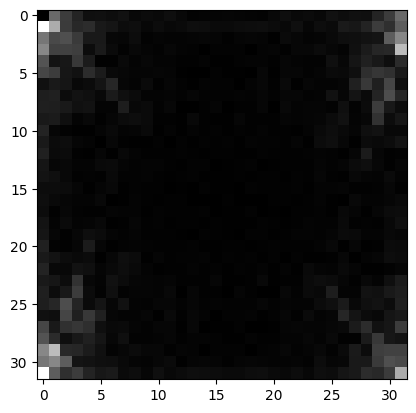

In [4]:
F[0][0] = 0
plt.imshow(F,cmap='gray')
# Setting the DC coefficient to 0 makes the other values more noticable.

## Compression process

In [5]:
def SetToZero(A, tol):
  # A is guaranteed to be a 32x32 block.

  totalNonZeros = 0
  droppedNonZeros = 0

  FFT = fft2(A)
  FFTMags = np.abs(FFT)

  FMax = np.max(FFTMags)
  cutoff = FMax * tol

  for i in range(32):
    for j in range(32):
      if (FFT[i][j] != 0):
        totalNonZeros += 1

      if FFTMags[i][j] <= cutoff:
        if (FFT[i][j] != 0):
          droppedNonZeros += 1

        FFT[i][j] = 0

  IFFT = ifft2(FFT)
  IFFT = np.real(IFFT)
  return IFFT, totalNonZeros, droppedNonZeros

def Compress(X, tol):
  # Assume X has dimensions divisible by 32.

  dimH = len(X)
  dimW = len(X[0])

  totalNonZeros = 0
  droppedNonZeros = 0

  Y = np.empty((dimH, dimW))
  
  for i in range(round(dimH/32)):
    for j in range(round(dimW/32)):
      block = X[i*32 : (i+1)*32, j*32 : (j+1)*32]
      result = SetToZero(block, tol)
      compressedBlock = result[0]
      totalNonZeros += result[1]
      droppedNonZeros += result[2]
      Y[i*32 : (i+1)*32, j*32 : (j+1)*32] = compressedBlock
  
  drop = droppedNonZeros/totalNonZeros
  
  return Y, drop

## Compression Levels

Drop Ratio: 0.514963577029556


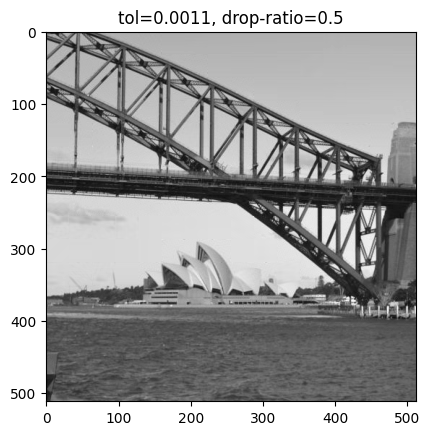

In [6]:
dr1 = 0.5
tol1 = 0.0011
Y, drop = Compress(f, tol1)
plt.title(f'tol={tol1}, drop-ratio={dr1}')
plt.imshow(Y,cmap='gray')
print(f"Drop Ratio: {drop}")

# Image produced by dropping 50% of values (zeros), requiring a tolerance of 0.0011. 

Drop Ratio: 0.8043676632073866


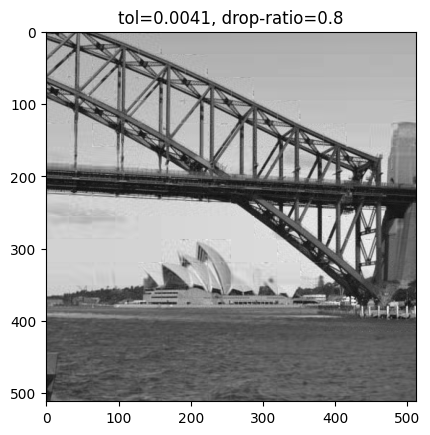

In [7]:
dr2 = 0.8
tol2 = 0.0041
Y, drop = Compress(f, tol2)
plt.title(f'tol={tol2}, drop-ratio={dr2}')
plt.imshow(Y,cmap='gray')
print(f"Drop Ratio: {drop}")

# Image produced by dropping 80% of values (zeros), requiring a tolerance of 0.0041. 


Drop Ratio: 0.9201594568260204


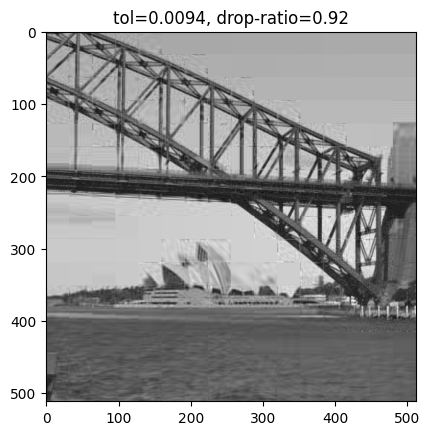

In [8]:
dr3 = 0.92
tol3 = 0.0094
Y, drop = Compress(f, tol3)
plt.title(f'tol={tol3}, drop-ratio={dr3}')
plt.imshow(Y,cmap='gray')
print(f"Drop Ratio: {drop}")

# Image produced by dropping 92% of values (zeros), requiring a tolerance of 0.0094. 


Drop Ratio: 0.9719133272499497


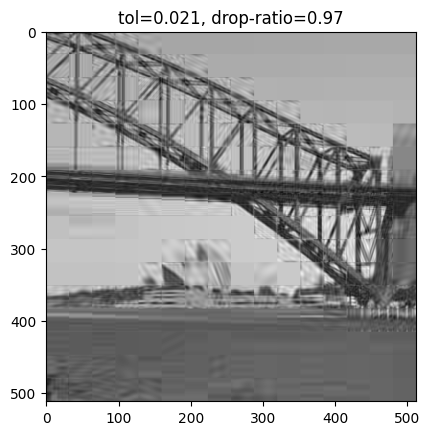

In [9]:
dr4 = 0.97
tol4 = 0.021
Y, drop = Compress(f, tol4)
plt.title(f'tol={tol4}, drop-ratio={dr4}')
plt.imshow(Y,cmap='gray')
print(f"Drop Ratio: {drop}")

# Image produced by dropping 97% of values (zeros), requiring a tolerance of 0.021. 


Drop Ratio: 0.9719133272499497


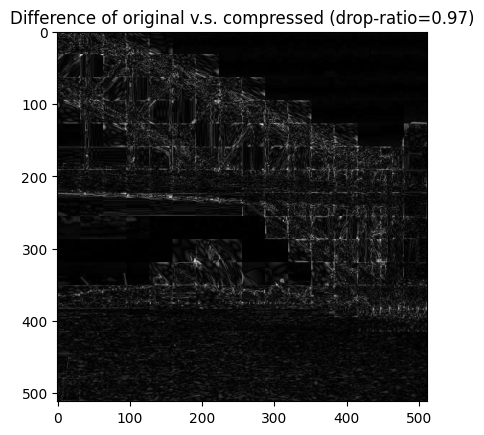

In [10]:
dimH = len(f)
dimW = len(f[0])

errorPlot = np.empty((dimW, dimH))

Y, drop = Compress(f, tol4)
print(f"Drop Ratio: {drop}")

for i in range(dimH):
  for j in range(dimW):
    errorPlot[i][j] = np.abs(f[i][j] - Y[i][j])

plt.title(f'Difference of original v.s. compressed (drop-ratio={dr4})')

plt.imshow(errorPlot,cmap='gray')

# Plot showing exactly what values were dropped to drop 97% dropping (97% compression).